In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('F:\\position_salaries.csv')

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


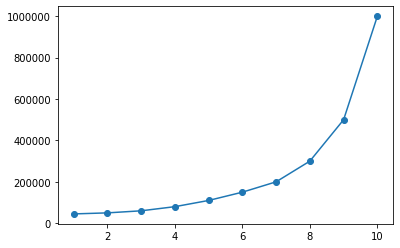

In [5]:
plt.scatter(df['Level'],df['Salary'])
plt.plot(df['Level'],df['Salary'])

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X=df['Level'].values.reshape(-1,1)
Y= df['Salary'].values.reshape(-1,1)
reg=LinearRegression()
model=reg.fit(X,Y)

In [9]:
Y_pre= model.predict(X)

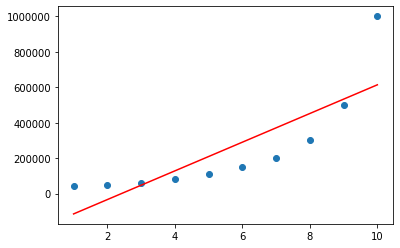

In [10]:
plt.scatter(df['Level'],df['Salary'])
plt.plot(df['Level'],Y_pre,color='red')

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
#Fitting PR to the data set:
poly_reg= PolynomialFeatures(degree=4)
X_poly= poly_reg.fit_transform(X)
pol_reg=LinearRegression()
pol_reg.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

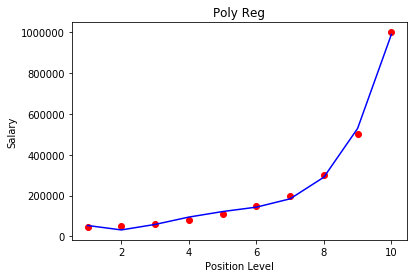

In [40]:
#Visualizing the PR results:
plt.scatter(X,Y,color='red')
plt.plot(X,pol_reg.predict(X_poly),color='blue')
plt.title('Poly Reg')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [41]:
#predicting a new result with PR
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([[132148.43750007]])

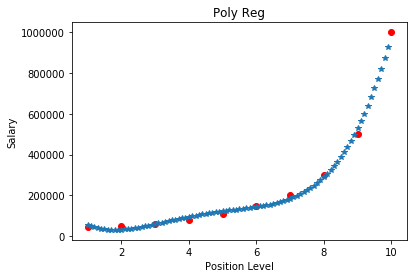

In [42]:
#additional feature
#making the plot line in (Blue one) more smooth
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,Y,color='red')
plt.plot(X_grid,pol_reg.predict(poly_reg.fit_transform(X_grid)),'*')
plt.title('Poly Reg')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [43]:
pol_reg.predict(poly_reg.fit_transform(X_grid))

array([[ 53356.64335683],
       [ 47451.92467964],
       [ 42551.3659675 ],
       [ 38586.75568193],
       [ 35492.01864811],
       [ 33203.21605485],
       [ 31658.5454546 ],
       [ 30798.34076345],
       [ 30565.0722611 ],
       [ 30903.34659093],
       [ 31759.90675992],
       [ 33083.6321387 ],
       [ 34825.53846154],
       [ 36938.77782633],
       [ 39378.63869463],
       [ 42102.54589159],
       [ 45070.06060604],
       [ 48242.88039043],
       [ 51584.83916082],
       [ 55061.90719695],
       [ 58642.19114218],
       [ 62295.93400348],
       [ 65995.5151515 ],
       [ 69715.45032051],
       [ 73432.39160839],
       [ 77125.12747669],
       [ 80774.58275059],
       [ 84363.81861889],
       [ 87878.03263405],
       [ 91304.55871214],
       [ 94632.86713289],
       [ 97854.56453965],
       [100963.39393943],
       [103955.23470283],
       [106828.10256414],
       [109582.14962126],
       [112219.66433571],
       [114745.07153269],
       [1171

In [44]:
#predicting a new result with PR:
pred= pol_reg.predict(poly_reg.fit_transform(X))

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
import math

In [47]:
math.sqrt(mean_squared_error(Y,pred))

14503.234909626897

In [38]:
pred

array([[118727.27272727],
       [ 44151.51515152],
       [  8439.39393939],
       [ 11590.90909091],
       [ 53606.06060606],
       [134484.84848485],
       [254227.27272727],
       [412833.33333333],
       [610303.03030303],
       [846636.36363636]])